In [24]:
import json
import pandas as pd
import numpy as np
import os
import glob
import re

from datetime import datetime, timedelta
from dotenv import load_dotenv

from sqlalchemy import create_engine
import psycopg2

# from .env import db info
load_dotenv()

db_password = os.getenv("db_password")
db_username = os.getenv("db_username")
db_url = os.getenv("db_url")
db_port = os.getenv("db_port")
db_name = os.getenv("db_name")
db_table = os.getenv("db_table")

import matplotlib.pyplot as plt

import time

In [ ]:
def get_data():
    #create the connection to the PostgreSQL database, then add the movies_df DataFrame to a SQL database.
    db_string = f"postgresql://{db_username}:{db_password}@{db_url}:{db_port}/{db_name}"
    engine = create_engine(db_string)
    return pd.read_sql(f"SELECT * FROM {db_table}", con=engine)

In [26]:
#create the connection to the PostgreSQL database, then add the movies_df DataFrame to a SQL database.
db_string = f"postgresql://{db_username}:{db_password}@{db_url}:{db_port}/{db_name}"
engine = create_engine(db_string)
df = pd.read_sql(f"SELECT * FROM {db_table}", con=engine)

In [27]:
df = get_data

In [28]:
lax_ord = df.loc[df["trip_id"].str.contains("LAX-ORD")]
lax_ord.head(3)

,time_stamp,trip_id,depart_airport,return_airport,depart_date,return_date,total_cost,depart_datetime,depart_duration,depart_stops,return_datetime,return_duration,return_stops,days_before_purchase
15,2022-06-23 04:54:01,LAX-ORD-06/23/2022-06/27/2022,LAX,ORD,2022-06-23,2022-06-27,714,2022-06-23 10:55:00,404,1,2022-06-27 13:19:00,253,0,0
16,2022-06-23 04:54:55,LAX-ORD-06/30/2022-07/04/2022,LAX,ORD,2022-06-30,2022-07-04,579,2022-06-30 08:05:00,242,0,2022-07-04 15:20:00,252,0,6
17,2022-06-23 04:55:50,LAX-ORD-07/07/2022-07/11/2022,LAX,ORD,2022-07-07,2022-07-11,494,2022-07-07 08:00:00,385,1,2022-07-11 07:19:00,262,0,13


In [29]:
sna_phx = df.loc[df["trip_id"].str.contains("SNA-PHX")]
sna_phx.head(3)

,time_stamp,trip_id,depart_airport,return_airport,depart_date,return_date,total_cost,depart_datetime,depart_duration,depart_stops,return_datetime,return_duration,return_stops,days_before_purchase
0,2022-06-23 04:40:11,SNA-PHX-06/23/2022-06/27/2022,SNA,PHX,2022-06-23,2022-06-27,353,2022-06-23 12:56:00,78,0,2022-06-27 10:13:00,88,0,0
1,2022-06-23 04:41:02,SNA-PHX-06/30/2022-07/04/2022,SNA,PHX,2022-06-30,2022-07-04,269,2022-06-30 12:56:00,78,0,2022-07-04 10:18:00,88,0,6
2,2022-06-23 04:41:52,SNA-PHX-07/07/2022-07/11/2022,SNA,PHX,2022-07-07,2022-07-11,239,2022-07-07 13:11:00,79,0,2022-07-11 10:18:00,88,0,13


In [30]:
sfo_iad = df.loc[df["trip_id"].str.contains("SFO-IAD")]
sfo_iad.head(3)

,time_stamp,trip_id,depart_airport,return_airport,depart_date,return_date,total_cost,depart_datetime,depart_duration,depart_stops,return_datetime,return_duration,return_stops,days_before_purchase
22,2022-06-24 01:30:59,SFO-IAD-06/30/2022-07/04/2022,SFO,IAD,2022-06-30,2022-07-04,1069,2022-06-30 07:05:00,310,0,2022-07-04 07:00:00,553,1,5
28,2022-06-24 01:52:03,SFO-IAD-06/30/2022-07/04/2022,SFO,IAD,2022-06-30,2022-07-04,1069,2022-06-30 07:05:00,310,0,2022-07-04 07:00:00,553,1,5
29,2022-06-24 01:52:57,SFO-IAD-07/07/2022-07/11/2022,SFO,IAD,2022-07-07,2022-07-11,958,2022-07-07 07:00:00,310,0,2022-07-11 16:10:00,355,0,12


In [31]:
sjc_msy = df.loc[df["trip_id"].str.contains("SJC-MSY")]
sjc_msy.head(3)

,time_stamp,trip_id,depart_airport,return_airport,depart_date,return_date,total_cost,depart_datetime,depart_duration,depart_stops,return_datetime,return_duration,return_stops,days_before_purchase
23,2022-06-24 01:31:56,SJC-MSY-06/30/2022-07/04/2022,SJC,MSY,2022-06-30,2022-07-04,1394,2022-06-30 12:37:00,484,2,2022-07-04 06:00:00,420,1,5
30,2022-06-24 01:53:56,SJC-MSY-06/30/2022-07/04/2022,SJC,MSY,2022-06-30,2022-07-04,1262,2022-06-30 09:13:00,593,2,2022-07-04 06:00:00,420,1,5
31,2022-06-24 01:54:56,SJC-MSY-07/07/2022-07/11/2022,SJC,MSY,2022-07-07,2022-07-11,784,2022-07-07 06:10:00,537,1,2022-07-11 07:25:00,625,2,12


In [32]:
bos_sna = df.loc[df["trip_id"].str.contains("BOS-SNA")]
bos_sna.head(3)

,time_stamp,trip_id,depart_airport,return_airport,depart_date,return_date,total_cost,depart_datetime,depart_duration,depart_stops,return_datetime,return_duration,return_stops,days_before_purchase
439,2022-06-26 11:20:37,BOS-SNA-07/01/2022-07/10/2022,BOS,SNA,2022-07-01,2022-07-10,740,2022-07-01 06:44:00,477,1,2022-07-10 07:53:00,780,1,4
440,2022-06-26 11:21:37,BOS-SNA-07/08/2022-07/17/2022,BOS,SNA,2022-07-08,2022-07-17,702,2022-07-08 05:30:00,486,1,2022-07-17 13:11:00,823,1,11
441,2022-06-26 11:22:35,BOS-SNA-07/15/2022-07/24/2022,BOS,SNA,2022-07-15,2022-07-24,1068,2022-07-15 06:44:00,482,1,2022-07-24 18:51:00,832,1,18


In [33]:
lax_muc = df.loc[df["trip_id"].str.contains("LAX-MUC")]
lax_muc.head(3)

,time_stamp,trip_id,depart_airport,return_airport,depart_date,return_date,total_cost,depart_datetime,depart_duration,depart_stops,return_datetime,return_duration,return_stops,days_before_purchase
139,2022-06-24 09:01:28,LAX-MUC-07/01/2022-07/05/2022,LAX,MUC,2022-07-01,2022-07-05,2187,2022-07-01 17:24:00,1261,2,2022-07-05 09:15:00,1117,1,6
140,2022-06-24 09:02:29,LAX-MUC-07/08/2022-07/12/2022,LAX,MUC,2022-07-08,2022-07-12,1860,2022-07-08 07:35:00,865,1,2022-07-12 09:15:00,1147,2,13
141,2022-06-24 09:03:35,LAX-MUC-07/15/2022-07/19/2022,LAX,MUC,2022-07-15,2022-07-19,2015,2022-07-15 07:35:00,865,1,2022-07-19 09:15:00,1147,2,20


In [39]:
lax_muc_trips = lax_muc["trip_id"].unique()
lax_muc_trips

array(['LAX-MUC-07/01/2022-07/05/2022', 'LAX-MUC-07/08/2022-07/12/2022',
       'LAX-MUC-07/15/2022-07/19/2022', 'LAX-MUC-07/22/2022-07/26/2022',
       'LAX-MUC-07/29/2022-08/02/2022', 'LAX-MUC-08/05/2022-08/09/2022',
       'LAX-MUC-08/12/2022-08/16/2022', 'LAX-MUC-08/19/2022-08/23/2022',
       'LAX-MUC-08/26/2022-08/30/2022', 'LAX-MUC-09/02/2022-09/06/2022',
       'LAX-MUC-09/09/2022-09/13/2022', 'LAX-MUC-09/16/2022-09/20/2022',
       'LAX-MUC-09/23/2022-09/27/2022', 'LAX-MUC-09/30/2022-10/04/2022',
       'LAX-MUC-10/07/2022-10/11/2022', 'LAX-MUC-10/14/2022-10/18/2022',
       'LAX-MUC-10/21/2022-10/25/2022', 'LAX-MUC-10/28/2022-11/01/2022',
       'LAX-MUC-11/04/2022-11/08/2022', 'LAX-MUC-11/11/2022-11/15/2022',
       'LAX-MUC-11/18/2022-11/22/2022', 'LAX-MUC-11/25/2022-11/29/2022',
       'LAX-MUC-12/02/2022-12/06/2022', 'LAX-MUC-12/09/2022-12/13/2022',
       'LAX-MUC-12/16/2022-12/20/2022', 'LAX-MUC-12/23/2022-12/27/2022',
       'LAX-MUC-12/30/2022-01/03/2023', 'LAX-MUC-01

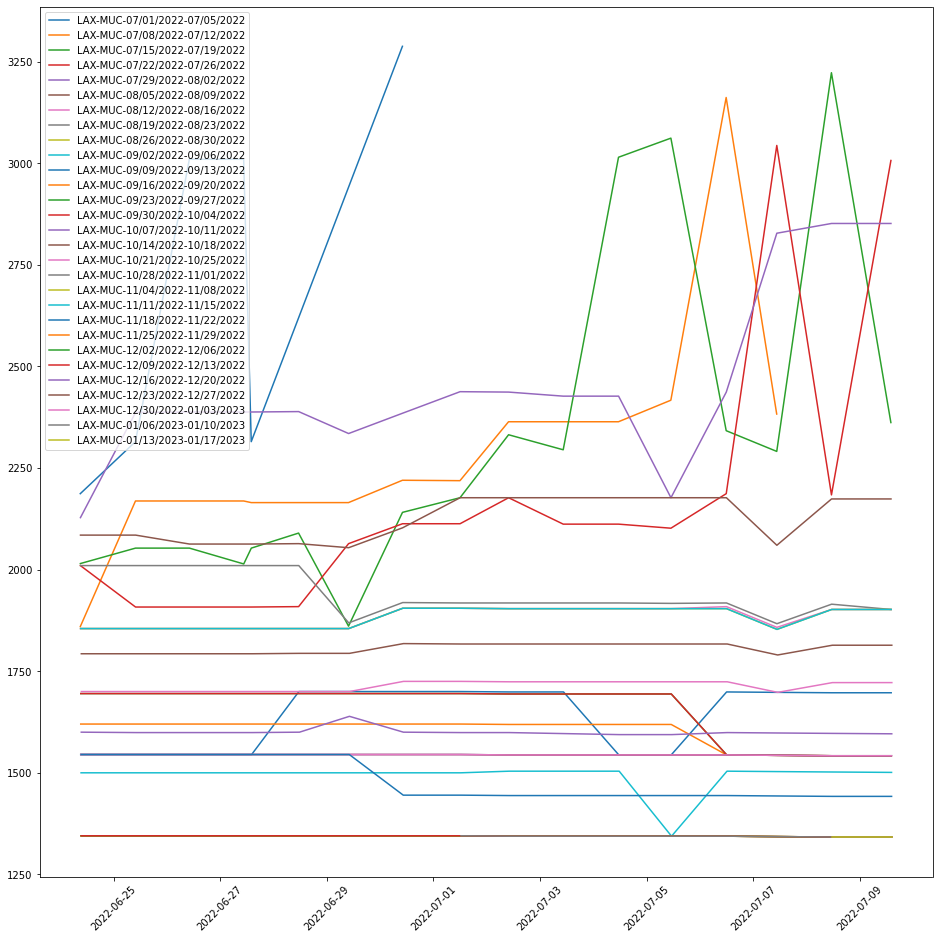

In [46]:
plt.rcParams["figure.figsize"] = (16,16)
for trip in lax_muc_trips:
    plt.plot(lax_muc["time_stamp"].loc[lax_muc["trip_id"]==trip],lax_muc["total_cost"].loc[lax_muc["trip_id"]==trip])

plt.xticks(rotation = 45)

plt.legend(lax_muc_trips)
plt.show()

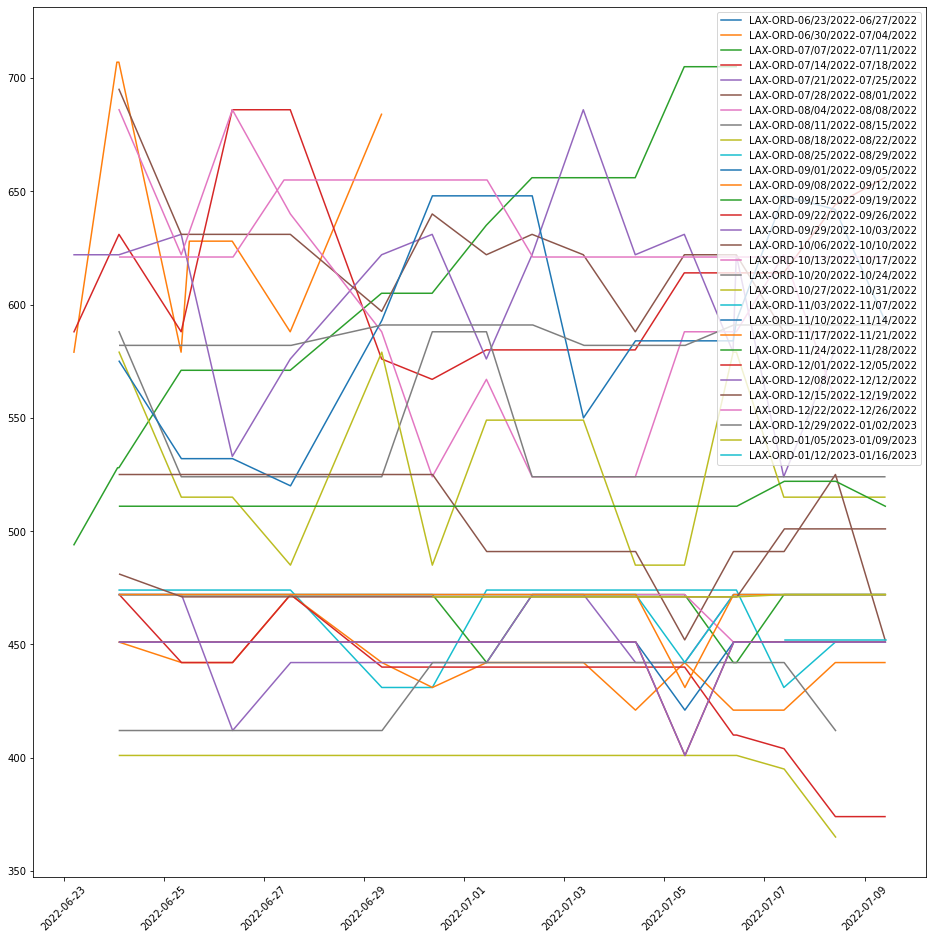

In [47]:
lax_ord_trips = lax_ord["trip_id"].unique()

plt.rcParams["figure.figsize"] = (16,16)
for trip in lax_ord_trips:
    plt.plot(lax_ord["time_stamp"].loc[lax_ord["trip_id"]==trip],lax_ord["total_cost"].loc[lax_ord["trip_id"]==trip])

plt.xticks(rotation = 45)

plt.legend(lax_ord_trips)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (16,16)
for trip in lax_muc_trips:
    plt.plot(lax_muc["time_stamp"].loc[lax_muc["trip_id"]==trip],lax_muc["total_cost"].loc[lax_muc["trip_id"]==trip])

plt.xticks(rotation = 45)

plt.legend(lax_muc_trips)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (16,16)
for trip in lax_muc_trips:
    plt.plot(lax_muc["time_stamp"].loc[lax_muc["trip_id"]==trip],lax_muc["total_cost"].loc[lax_muc["trip_id"]==trip])

plt.xticks(rotation = 45)

plt.legend(lax_muc_trips)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (16,16)
for trip in lax_muc_trips:
    plt.plot(lax_muc["time_stamp"].loc[lax_muc["trip_id"]==trip],lax_muc["total_cost"].loc[lax_muc["trip_id"]==trip])

plt.xticks(rotation = 45)

plt.legend(lax_muc_trips)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (16,16)
for trip in lax_muc_trips:
    plt.plot(lax_muc["time_stamp"].loc[lax_muc["trip_id"]==trip],lax_muc["total_cost"].loc[lax_muc["trip_id"]==trip])

plt.xticks(rotation = 45)

plt.legend(lax_muc_trips)
plt.show()